# Leetcode Unblockers

* If you see relationships between items, dependencies, etc., put everything into a graph (topological sort, connected components, simple traversals)
* If you're dealing with integers and trying to reduce a quadratic time algorithm, try sorting the input first
* Try throwing everything into a hash map
* For INTERVAL INTERSECTION:
    * 2 intervals intersect if the max(lo) <= min(hi)
    * lo = max(l1[0], l2[0])
    * hi = min(l1[1], l2[1])
    * if lo <= hi, you have an intersection
* You can run BFS from the beginning and from the end at the same time! This cuts runtime and space complexity.
* You can always copy an array!
* If you're stuck using 2 pointers, consider using more pointers!
* Whenever you're trying to solve an array problem in-place, always consider the possibility of iterating backwards instead of forwards through the array. It can completely change the problem, and make it a lot easier.
* SERIOUSLY consider the implications of re-using lists in Python--in recursion problems, you almost always need to deepcopy the list using [:]
* MANY Linked List problems involve using multiple pointers traversing the list at varying speeds (one slow, one fast)
* Kahn's Algorithm for finding a topological order:
    * First, find indegree of all nodes and store in hash map
    * Initialise a queue with all nodes with indegree of 0
    * Pop from the queue and add node to topological order. Decrease indegree of all adjacent nodes by 1. If any indegrees reduce to 0, add that node to the queue
    * At the end, if all nodes are present in the topological order, you've found a valid answer. Otherwise, there's a cycle and an answer isn't possible.
    * See solution for LC 210

In [ ]:
# Reverse linked list
prev, curr = None, slow
while curr:
    curr.next, prev, curr = prev, curr, curr.next      

# Things to Remember/Bring Up

* Hashing costs compute power! Consider how much time the hash function itself will take whenever you're proposing a hash map-based solution!

# Order of Growth Functions

Only a few possible order of growth functions for (almost) all algorithms:
- 1 (constant time)
- log N
- N
- N log N
- N^2
- N^3
- 2^N

# Towards a Problem-Solving Model

Think about classifying problems according to their computational requirements and classifying problems according to how hard they are to solve.
* Note there are quite a few problems where we can't really do this

# Reductions

The study of reductions is that we can use simple, well-understood algorithms to solve much more complex and seemingly unrelated problems.

Definition: A problem X reduces to problem Y if you can use an algorithm that solves Y to help solve X
* Then, the cost of solving X = the total cost of solving Y + the cost of reduction

Example: Finding the median <strong>reduces</strong> to sorting--sort N item, then return the item in the middle
* Cost of solving finding the median: N log N (cost of sorting) + 1 (cost of the reduction)

More examles of reductions:

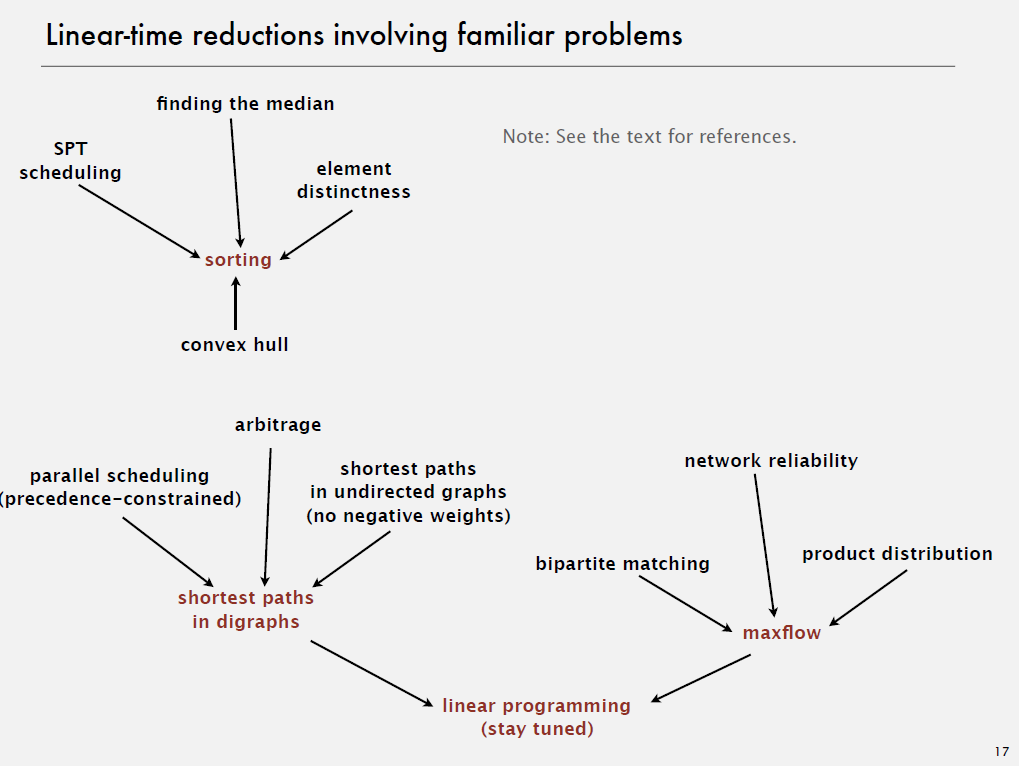

## Establishing Lower Bounds

Establishing lower bounds is a really difficult problem, but reductions can allow you to prove lower bounds for other problems

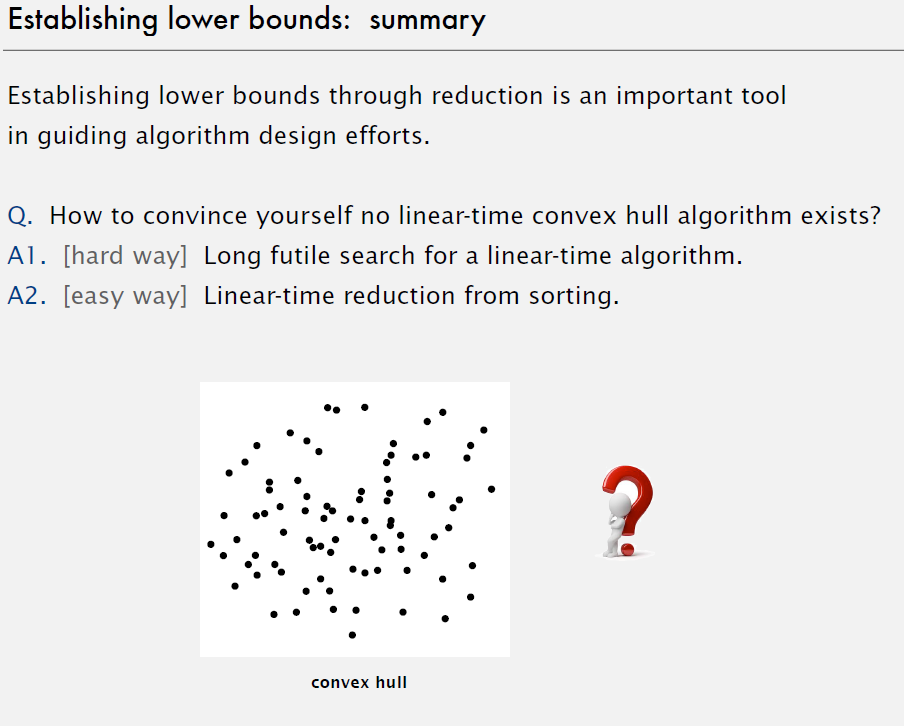

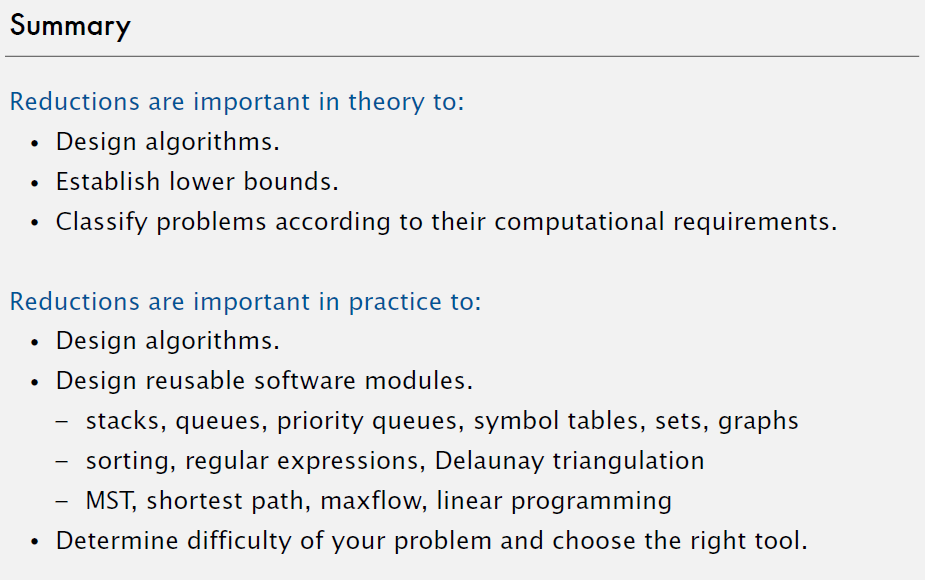

# Linear Programming

Linear programming is another generic problem-solving model for optimal allocation of scarce resrouces, among a number of competing activities

Linear programming encompasses a number of other problems, including shortest paths, maxflow, MST, matching, assignment, two-person zero-sum games, and more

To understand the kind of problem linear programming can help solve, consider the optimisation question posed by the Brewer's Problem:

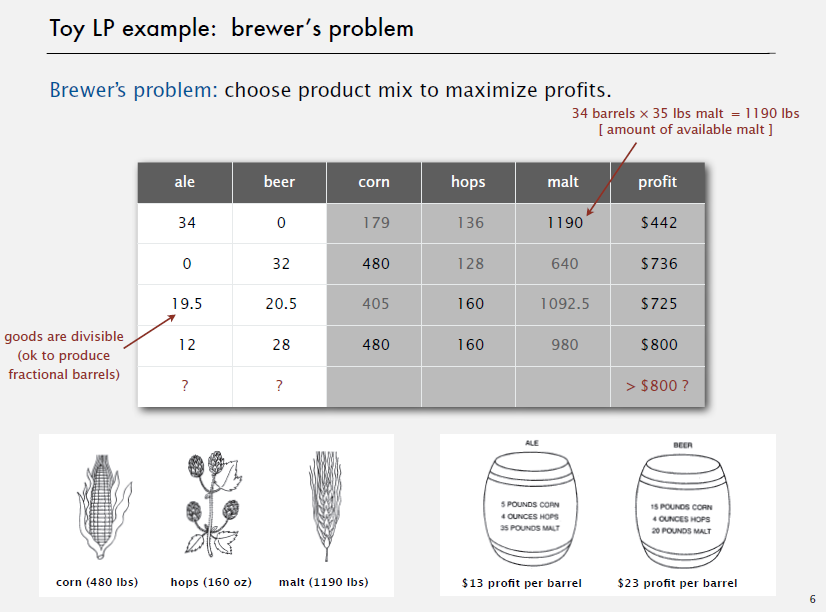

Linear programming requires a mathematical formulation of the problem, including objective function and constraints:

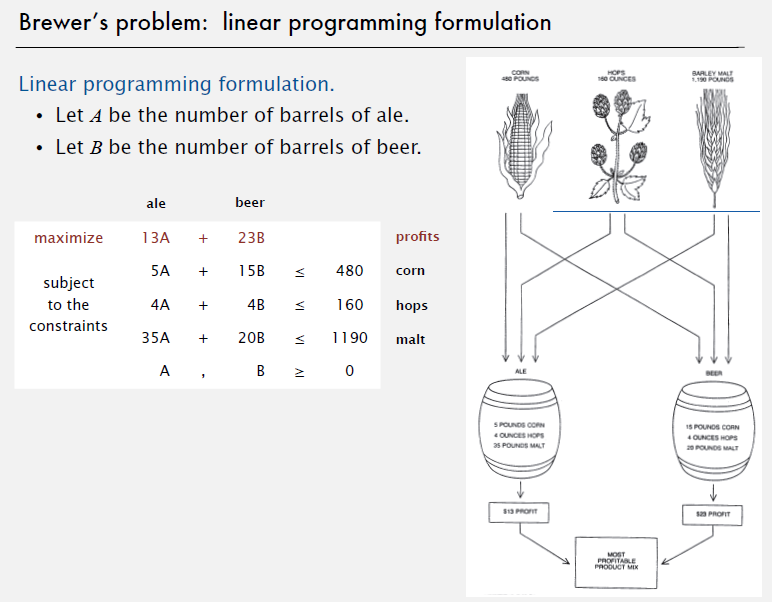

Considering the constraints as defining half-planes, you can get a convex polygon that defines the <strong>feasible region</strong> of possible solutions.

The objective function can then also be considered as another line. The points at which the objective function line intersects the feasible region define the range of possible optimal solutions

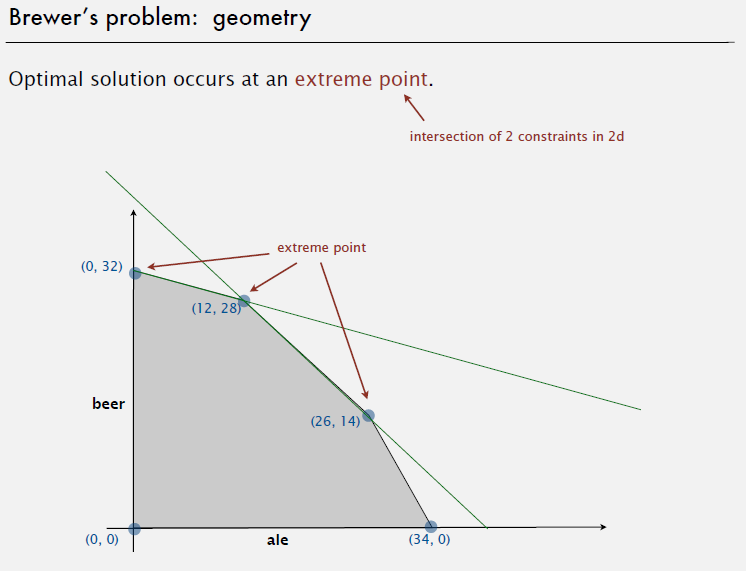

## Simplex Algorithm

Uses linear algebra to solve the linear programming problem:
1. Start at some extreme point
2. Pivot from one extreme point to an adjacent one
3. Repeat until you're found the optimal solution

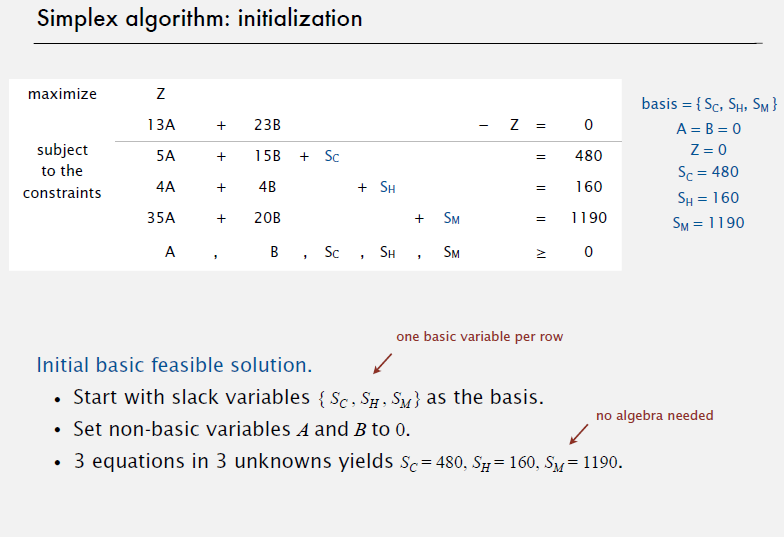

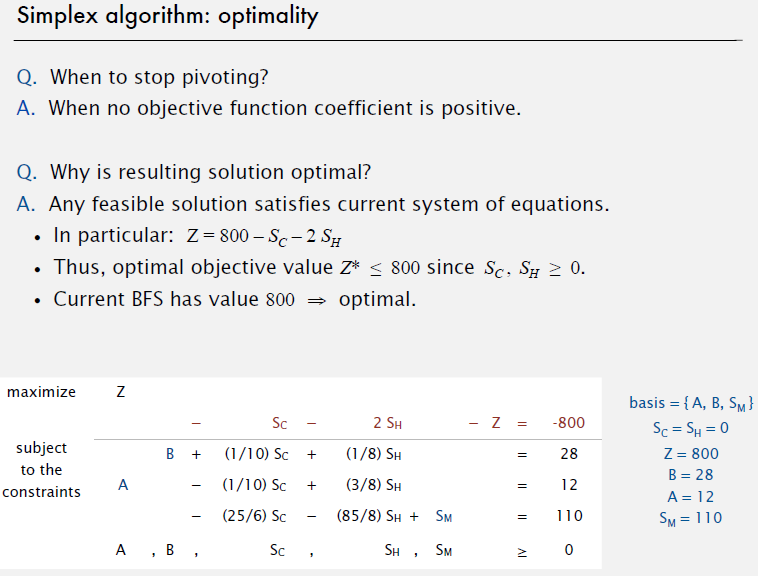

## Simplex Algorithm Implementation

The code to implement a bare-bones version of the Simplex algorithm is really straightforward, but there are a lot of edge cases to watch out for, so just use a built-in method.

Important to understand the general problems linear programming can help solve though, since it's such an important and widely-used algorithm. There are also more advanced linear programming solvers now as well in addition to the simplex algorithm.

## Linear Programming Reductions

The term 'linear programming' is now called 'reduction to linear programming'

General steps to reduce a problem to a LP model are:
1. Identify variables
2. Define constraints
3. Define an objective function
4. Convert to the standard form of a LP problem

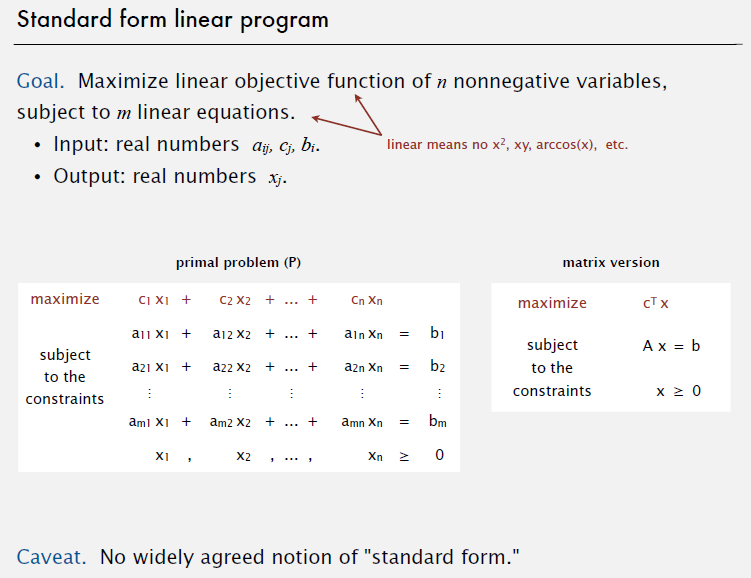

### Examples of Reductions to LP

1. Maxflow

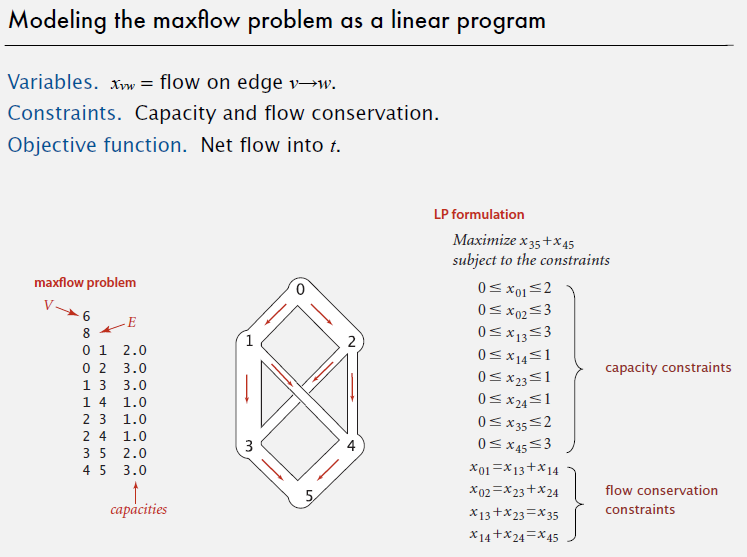

2. Bipartite Matching Problem

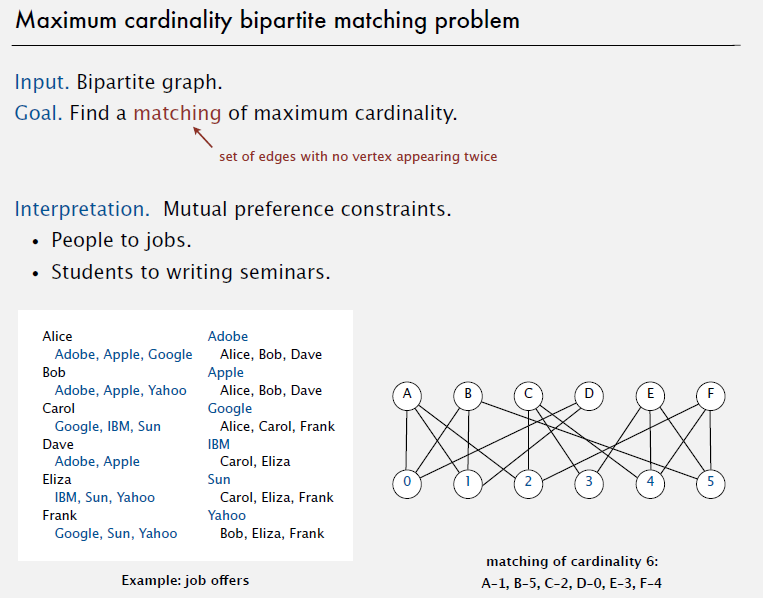

Zooming out a bit, if you have a maxmimisation problem, you've got a few options:
1. Use a specialised algorithm
2. Use linear programming
    * Many problems are also easily modeled as LPs, which can be solved by commercial LP solvers
    * Might be a bit slower than a specialised algorithm, but with the benefit that additional complexity might be easier to accomodate (new constraints, etc.)
    
<strong>Bottom line: linear programming is the closest thing we have to a universal problem-solving model!</strong>
* But see below for discussion of intractable problems

# Intractability

Turing formulated a <strong>universal model of computation</strong> that cannot be improved on

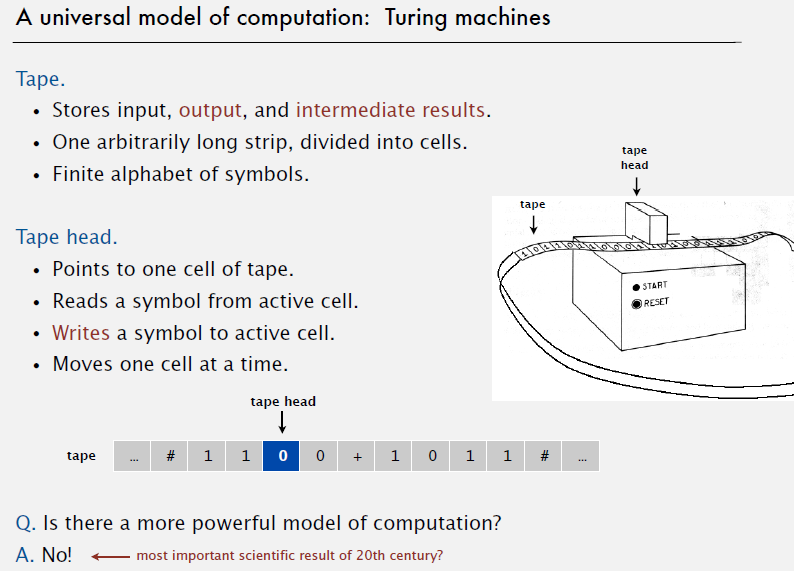

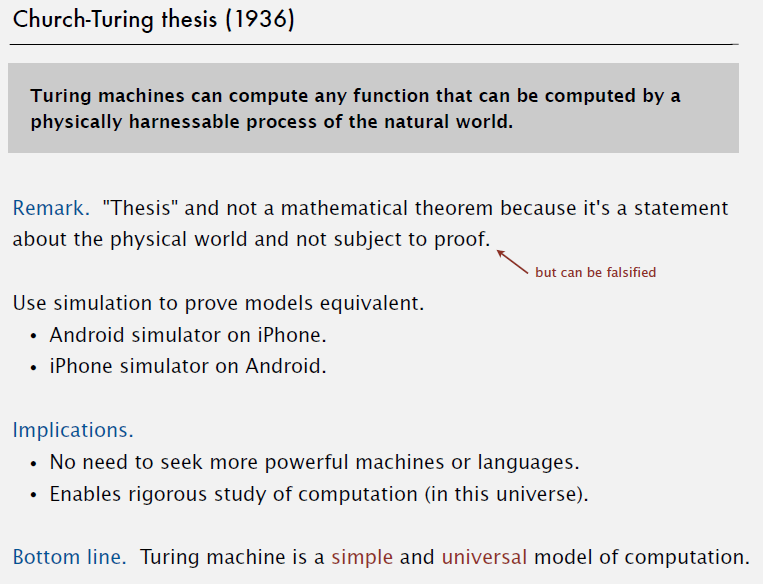

There have been many, many proposed models of computation that have turned out to be no better than the Turing model

But, the Turing model doesn't address efficiency, which is where the study of algorithms comes in

So, which kinds of algorithms are useful in practice?
* <strong>The dividing line is whether the algorithm runs in polynomial time or exponential time across all possible inputs</strong>
* Example: merge sort (N log N) vs traveling salesperson using brute force search (N!)
* Algorithms that require exponential time are <strong>not possible to solve in practice</strong>
    * Very quickly, the time it would take to solve a problem using an exponential algorithm exceeds the capacity of the universe
* That leads to the question of which problems have polynomial time algorithms

## Intractability Defined

<strong>Intractability:</strong> A problem is said to be intractable if it can't be solved in polynomial time
* Turns out to be quite difficult to prove that a problem is intractable (with a few exceptions)

## Search Problems

A <strong>search problem</strong> simply stated is: Given an instance I of a problem, find a solution S
* Requirement: Must be able to check efficiently (ie, in polynomial time) that S is a solution
* Linear programming is a search problem: given a system of linear inequalities, find a solution
    * Can check that a given solution is in fact a solution by simply plugging in values to the set of inequalities
* The travelling salesperson problem is NOT a search problem though, because there is no efficient way to check whether a possible solution is in fact a solution
    * Doing so would require a polynomial time algorithm capable of solving the TSP problem, which does not exist

# P and NP

<strong>NP:</strong> the class of all search problems
* Nondeterministic polynomial time
* What scientists aspire to compute feasibly

<strong>P:</strong> the class of all search problems solvable in polynomial time
* Polynomial time
* What scientists actually do compute feasibly

<strong>Nondeterminism:</strong> the quality of one state leading to multiple possible subsequent states--impossible to determine which state will result from a given current state
* A nondeterministic machine can guess the desired solution to a problem

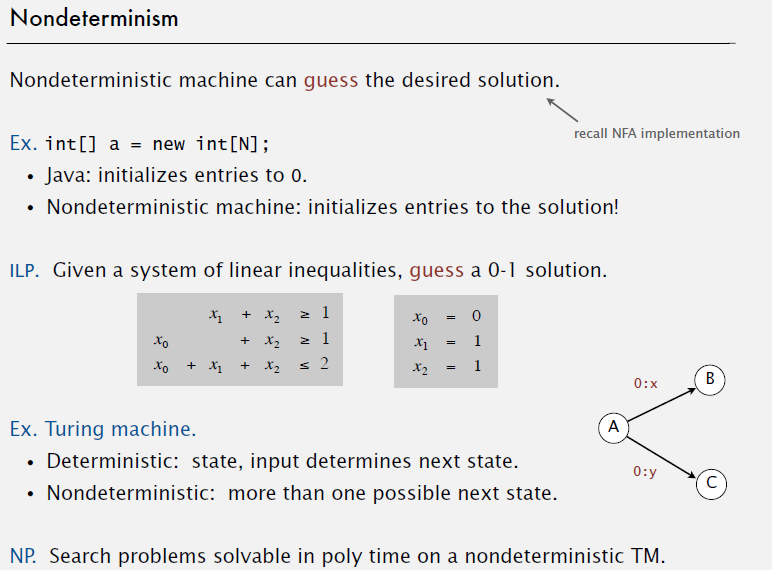

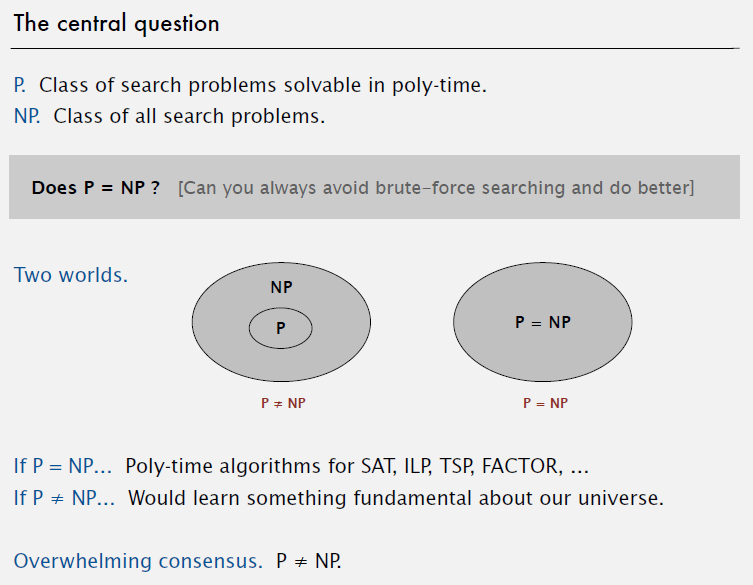

## Classifying Problems as P vs NP

A key problem: <strong>satisfiability</strong>
* Given a system of boolean equations, find a solution
* Clearly a search problem (given a solution, check if it works)
* But is this a P problem?

Possible solutions:
* Brute force: try all 2^n truth assigments
* Can we so substantially better? <strong>NO</strong>

Since we're so confident that satisfiability is intractable, if we can reduce other problems to satisfiability, we can also confidently say that those problems are also intractable.

And it turns out that TONS of problems reduce from the satisfiability problem,  implying that they are intractable (1000+ scientific papers per year showing various problems result from the satisfiability problem!)

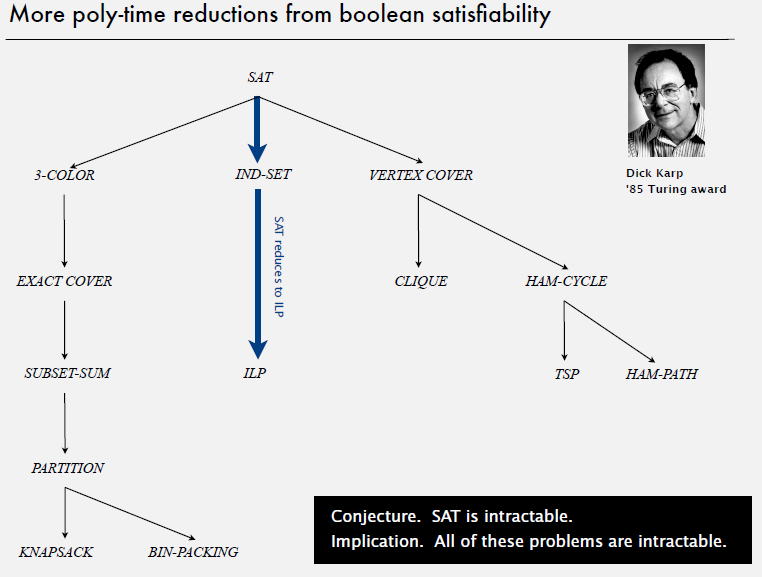

## NP-Completeness

An NP problem is NP-complete if all problems in NP polynomial time reduce to it
* Satisfiability is NP-complete--every NP problem reduces to satisfiability

Profound implication: <strong>Satisfiability captures the difficulty of the entire class NP</strong>
* All NP problems reduce to satisifiability, therefore, solving any of them in polynomial time implies they can all be solved in polynomial time and that, therefore, P = NP
* Showing that a problem is NP-complete is therefore an extremely valuable logical tool to guide inquiry: If a problem is shown to be NP-complete, might as well stop working on trying to solve it

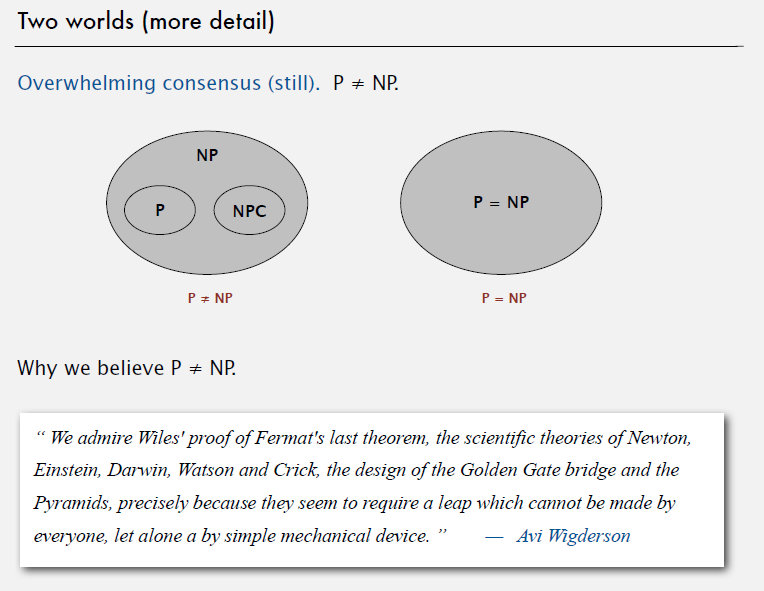

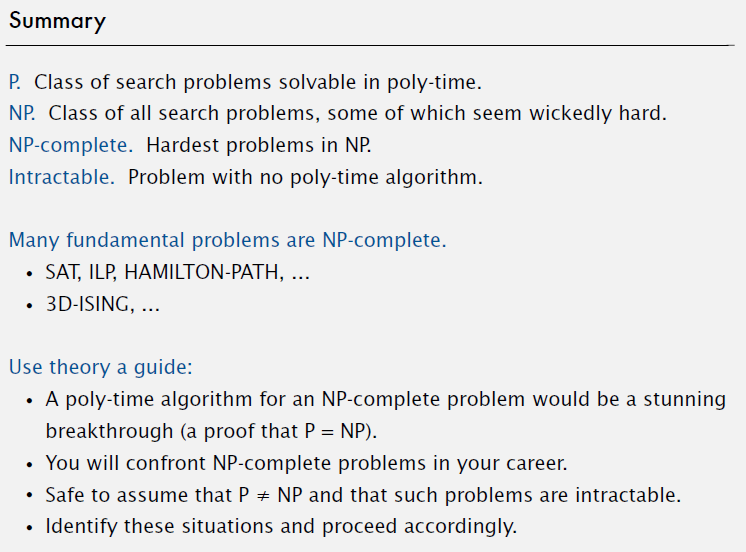

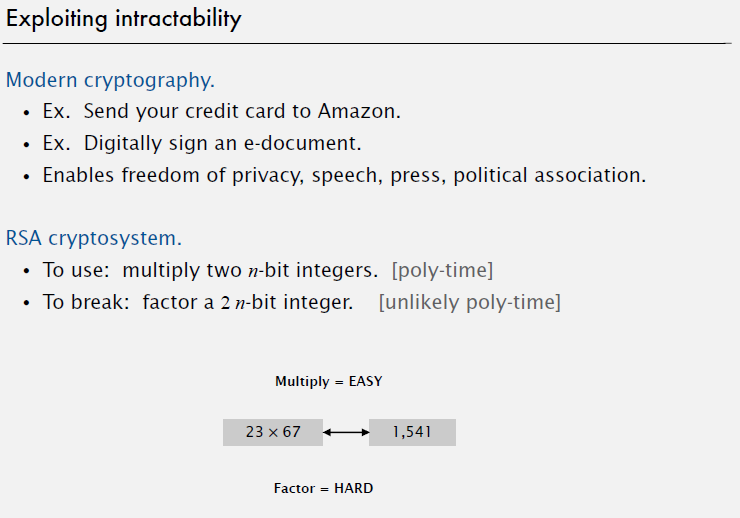

### Coping with Intractability

Faced with an intractable problem, how can you proceed?

Relax one of the desired features?
1. Solve only certain instances of a problem, instead of all instances
2. Solve for a good enough solution, instead of the optimal solution
3. Solve in non-polynomial time for some instances that are of practical importance, instead of polynomial time for all instances

Example: the Hamilton path problem is NP-complete, but it can be solved in exponential time for small graphs

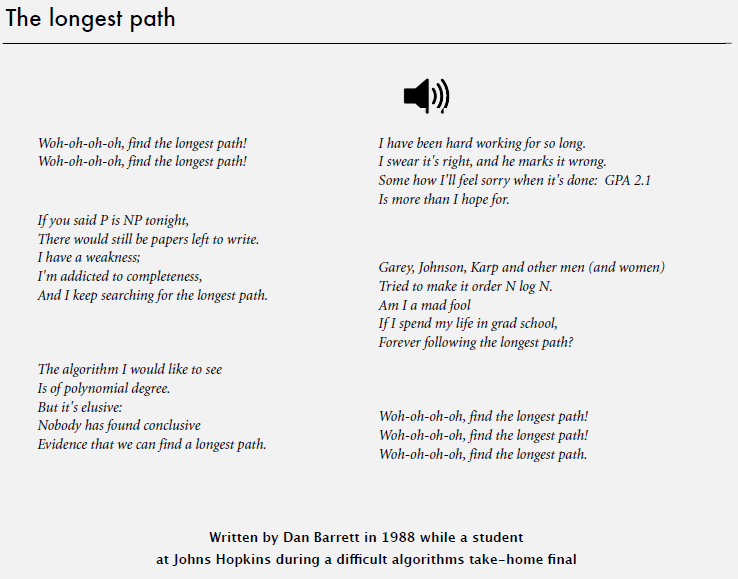